In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [19]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# Prepare training dataset

In [20]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [21]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [22]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [23]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [24]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [25]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [26]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [27]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1) - 0.1
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1) + 0.1
    return data.to(device)


In [28]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [29]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [30]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 20.96it/s]                                                           


Epoch 1 of 100
Generator loss: 1.58061285, Discriminator loss: 1.00968039


118it [00:05, 20.42it/s]                                                           


Epoch 2 of 100
Generator loss: 2.21500115, Discriminator loss: 1.02103295


118it [00:05, 20.56it/s]                                                           


Epoch 3 of 100
Generator loss: 2.15844678, Discriminator loss: 1.04163803


118it [00:05, 21.04it/s]                                                           


Epoch 4 of 100
Generator loss: 1.27193478, Discriminator loss: 1.19222108


118it [00:05, 20.58it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


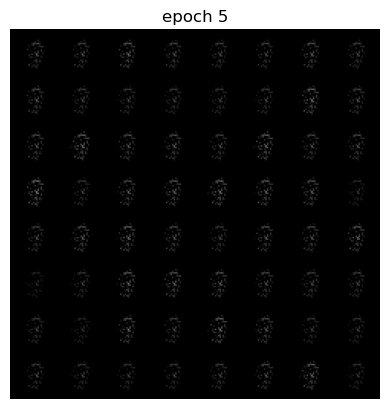

Epoch 5 of 100
Generator loss: 1.19000891, Discriminator loss: 1.13118440


118it [00:05, 20.09it/s]                                                           


Epoch 6 of 100
Generator loss: 1.68886044, Discriminator loss: 1.09572565


118it [00:05, 20.69it/s]                                                           


Epoch 7 of 100
Generator loss: 1.49995545, Discriminator loss: 1.16296215


118it [00:05, 21.04it/s]                                                           


Epoch 8 of 100
Generator loss: 0.94760794, Discriminator loss: 1.34629475


118it [00:05, 20.83it/s]                                                           


Epoch 9 of 100
Generator loss: 1.09511032, Discriminator loss: 1.09695999


118it [00:05, 20.59it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


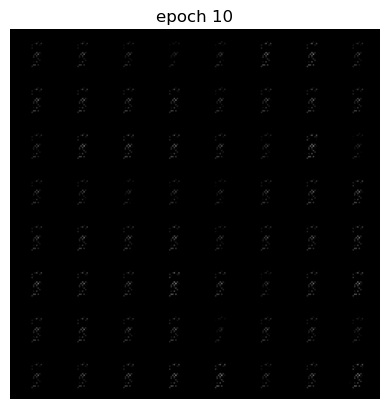

Epoch 10 of 100
Generator loss: 1.53803741, Discriminator loss: 0.97050687


118it [00:05, 21.11it/s]                                                           


Epoch 11 of 100
Generator loss: 1.59591368, Discriminator loss: 0.92247617


118it [00:05, 20.89it/s]                                                           


Epoch 12 of 100
Generator loss: 1.78963007, Discriminator loss: 0.80197814


118it [00:05, 20.82it/s]                                                           


Epoch 13 of 100
Generator loss: 1.89030871, Discriminator loss: 0.76077667


118it [00:05, 21.03it/s]                                                           


Epoch 14 of 100
Generator loss: 1.90235188, Discriminator loss: 0.79601486


118it [00:05, 20.88it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


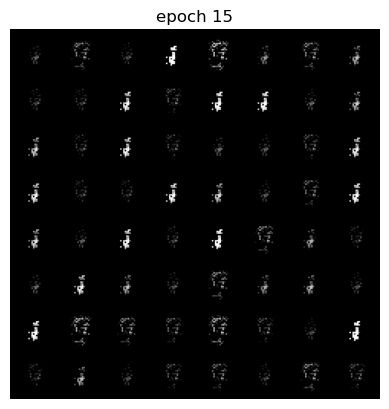

Epoch 15 of 100
Generator loss: 2.06305313, Discriminator loss: 0.76374054


118it [00:05, 21.15it/s]                                                           


Epoch 16 of 100
Generator loss: 2.15684179, Discriminator loss: 0.79116133


118it [00:05, 21.63it/s]                                                           


Epoch 17 of 100
Generator loss: 2.03418183, Discriminator loss: 0.80679750


118it [00:05, 20.89it/s]                                                           


Epoch 18 of 100
Generator loss: 2.08751093, Discriminator loss: 0.83759888


118it [00:05, 21.01it/s]                                                           


Epoch 19 of 100
Generator loss: 2.03269808, Discriminator loss: 0.80443775


118it [00:05, 21.30it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


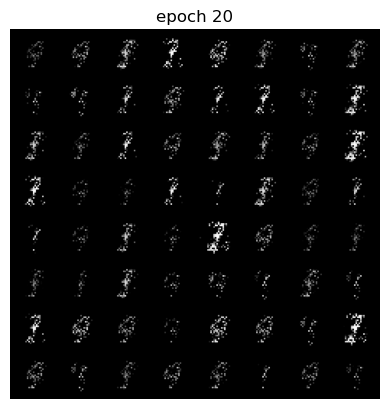

Epoch 20 of 100
Generator loss: 2.16337182, Discriminator loss: 0.81615454


118it [00:05, 21.20it/s]                                                           


Epoch 21 of 100
Generator loss: 2.11205446, Discriminator loss: 0.83518115


118it [00:05, 20.65it/s]                                                           


Epoch 22 of 100
Generator loss: 2.02766779, Discriminator loss: 0.81856994


118it [00:05, 20.94it/s]                                                           


Epoch 23 of 100
Generator loss: 1.93501525, Discriminator loss: 0.87586172


118it [00:05, 20.47it/s]                                                           


Epoch 24 of 100
Generator loss: 1.99420033, Discriminator loss: 0.84070265


118it [00:05, 21.26it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


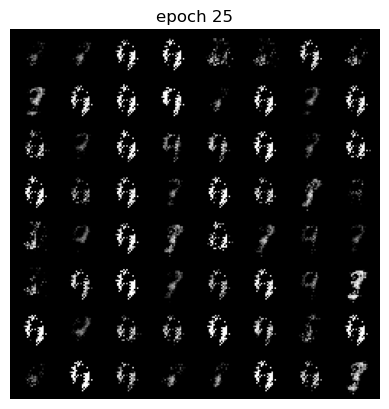

Epoch 25 of 100
Generator loss: 2.01126901, Discriminator loss: 0.86249268


118it [00:05, 20.79it/s]                                                           


Epoch 26 of 100
Generator loss: 1.97596767, Discriminator loss: 0.81282065


118it [00:05, 21.49it/s]                                                           


Epoch 27 of 100
Generator loss: 1.98490248, Discriminator loss: 0.82324041


118it [00:05, 21.61it/s]                                                           


Epoch 28 of 100
Generator loss: 1.93797363, Discriminator loss: 0.85506733


118it [00:05, 21.52it/s]                                                           


Epoch 29 of 100
Generator loss: 2.01656374, Discriminator loss: 0.82786837


118it [00:05, 20.39it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


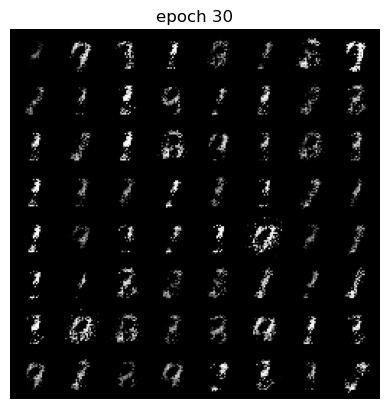

Epoch 30 of 100
Generator loss: 1.89024445, Discriminator loss: 0.85476702


118it [00:05, 21.03it/s]                                                           


Epoch 31 of 100
Generator loss: 1.94371718, Discriminator loss: 0.83278571


118it [00:05, 21.63it/s]                                                           


Epoch 32 of 100
Generator loss: 2.00715746, Discriminator loss: 0.82580647


118it [00:05, 20.72it/s]                                                           


Epoch 33 of 100
Generator loss: 1.90127602, Discriminator loss: 0.84352908


118it [00:05, 20.93it/s]                                                           


Epoch 34 of 100
Generator loss: 1.84894970, Discriminator loss: 0.86752346


118it [00:05, 20.87it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


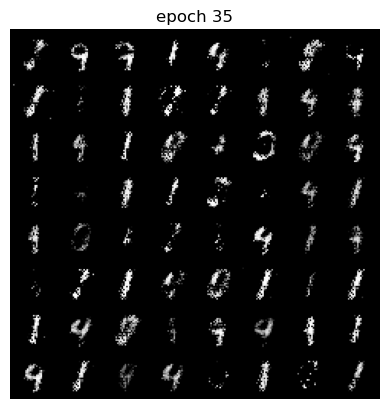

Epoch 35 of 100
Generator loss: 1.80057815, Discriminator loss: 0.86318912


118it [00:05, 20.87it/s]                                                           


Epoch 36 of 100
Generator loss: 1.85412302, Discriminator loss: 0.84381294


118it [00:05, 21.52it/s]                                                           


Epoch 37 of 100
Generator loss: 1.77190444, Discriminator loss: 0.86375227


118it [00:05, 21.52it/s]                                                           


Epoch 38 of 100
Generator loss: 1.81277233, Discriminator loss: 0.84068114


118it [00:05, 20.96it/s]                                                           


Epoch 39 of 100
Generator loss: 1.79230412, Discriminator loss: 0.86153185


118it [00:05, 20.36it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


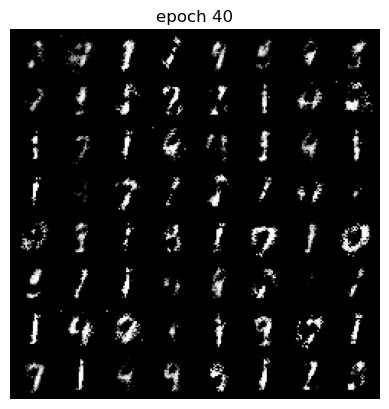

Epoch 40 of 100
Generator loss: 1.75474947, Discriminator loss: 0.86164007


118it [00:05, 20.96it/s]                                                           


Epoch 41 of 100
Generator loss: 1.72788077, Discriminator loss: 0.86722846


118it [00:05, 20.55it/s]                                                           


Epoch 42 of 100
Generator loss: 1.72453289, Discriminator loss: 0.87541277


118it [00:05, 21.45it/s]                                                           


Epoch 43 of 100
Generator loss: 1.73282305, Discriminator loss: 0.87562984


118it [00:05, 21.53it/s]                                                           


Epoch 44 of 100
Generator loss: 1.77759489, Discriminator loss: 0.87382452


118it [00:05, 21.69it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


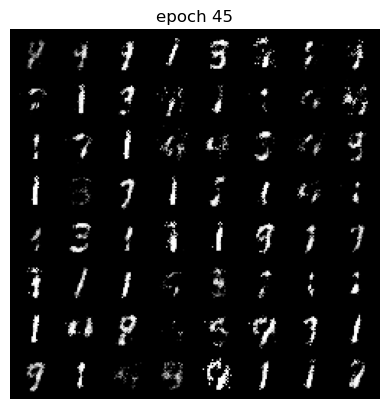

Epoch 45 of 100
Generator loss: 1.66942242, Discriminator loss: 0.90662160


118it [00:05, 21.34it/s]                                                           


Epoch 46 of 100
Generator loss: 1.66115495, Discriminator loss: 0.93595060


118it [00:05, 20.64it/s]                                                           


Epoch 47 of 100
Generator loss: 1.69683552, Discriminator loss: 0.91545043


118it [00:05, 21.54it/s]                                                           


Epoch 48 of 100
Generator loss: 1.60709237, Discriminator loss: 0.91449260


118it [00:05, 21.52it/s]                                                           


Epoch 49 of 100
Generator loss: 1.65620438, Discriminator loss: 0.94176549


118it [00:05, 21.50it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


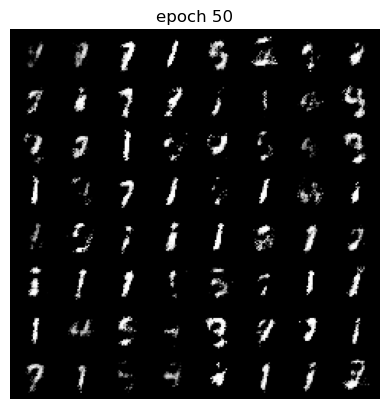

Epoch 50 of 100
Generator loss: 1.67796959, Discriminator loss: 0.93602567


118it [00:05, 21.10it/s]                                                           


Epoch 51 of 100
Generator loss: 1.55976174, Discriminator loss: 0.93192645


118it [00:05, 20.79it/s]                                                           


Epoch 52 of 100
Generator loss: 1.53433956, Discriminator loss: 0.94860290


118it [00:05, 20.70it/s]                                                           


Epoch 53 of 100
Generator loss: 1.62555932, Discriminator loss: 0.92864241


118it [00:05, 21.34it/s]                                                           


Epoch 54 of 100
Generator loss: 1.56303767, Discriminator loss: 0.95922265


118it [00:05, 21.56it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


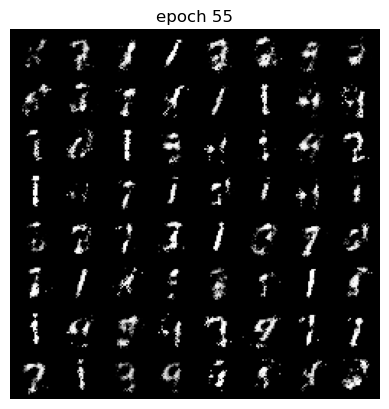

Epoch 55 of 100
Generator loss: 1.54414058, Discriminator loss: 0.95572142


118it [00:05, 21.43it/s]                                                           


Epoch 56 of 100
Generator loss: 1.53016310, Discriminator loss: 0.99481694


118it [00:05, 21.61it/s]                                                           


Epoch 57 of 100
Generator loss: 1.50807119, Discriminator loss: 0.97855475


118it [00:05, 21.46it/s]                                                           


Epoch 58 of 100
Generator loss: 1.58070711, Discriminator loss: 0.94962151


118it [00:05, 20.50it/s]                                                           


Epoch 59 of 100
Generator loss: 1.53390126, Discriminator loss: 0.97871702


118it [00:05, 21.23it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


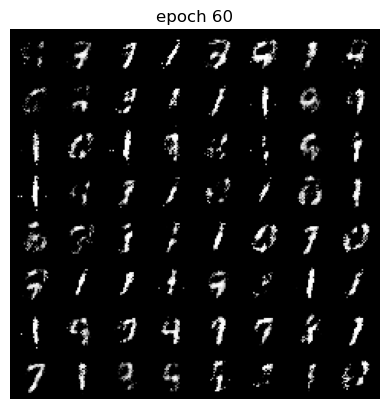

Epoch 60 of 100
Generator loss: 1.48619052, Discriminator loss: 0.97216885


118it [00:05, 20.90it/s]                                                           


Epoch 61 of 100
Generator loss: 1.47203286, Discriminator loss: 0.98805919


118it [00:05, 20.87it/s]                                                           


Epoch 62 of 100
Generator loss: 1.44688209, Discriminator loss: 1.03437120


118it [00:05, 20.83it/s]                                                           


Epoch 63 of 100
Generator loss: 1.46347668, Discriminator loss: 1.00637473


118it [00:05, 20.60it/s]                                                           


Epoch 64 of 100
Generator loss: 1.43580429, Discriminator loss: 0.99602551


118it [00:05, 20.19it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


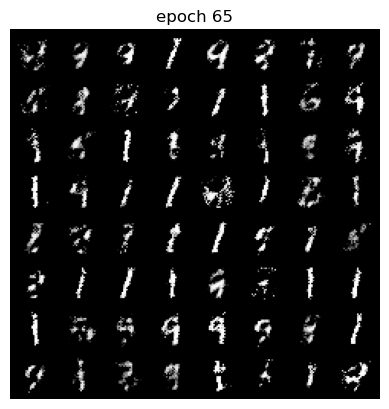

Epoch 65 of 100
Generator loss: 1.49954789, Discriminator loss: 0.96961889


118it [00:05, 20.85it/s]                                                           


Epoch 66 of 100
Generator loss: 1.51224280, Discriminator loss: 0.97689561


118it [00:05, 20.84it/s]                                                           


Epoch 67 of 100
Generator loss: 1.42597195, Discriminator loss: 1.04173802


118it [00:05, 20.67it/s]                                                           


Epoch 68 of 100
Generator loss: 1.42161483, Discriminator loss: 1.00981339


118it [00:05, 20.48it/s]                                                           


Epoch 69 of 100
Generator loss: 1.41387613, Discriminator loss: 1.03805489


118it [00:05, 21.69it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


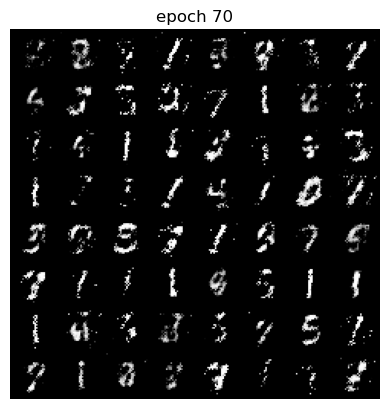

Epoch 70 of 100
Generator loss: 1.38522147, Discriminator loss: 1.04742788


118it [00:05, 21.31it/s]                                                           


Epoch 71 of 100
Generator loss: 1.49968400, Discriminator loss: 1.00932922


118it [00:05, 21.51it/s]                                                           


Epoch 72 of 100
Generator loss: 1.40898426, Discriminator loss: 1.02042130


118it [00:05, 20.99it/s]                                                           


Epoch 73 of 100
Generator loss: 1.38654680, Discriminator loss: 1.04750771


118it [00:05, 21.65it/s]                                                           


Epoch 74 of 100
Generator loss: 1.43047933, Discriminator loss: 1.02111240


118it [00:05, 21.02it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


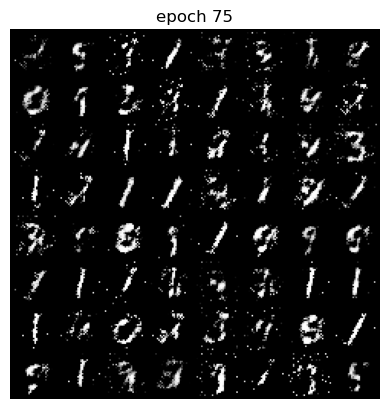

Epoch 75 of 100
Generator loss: 1.40884780, Discriminator loss: 1.02599635


118it [00:05, 21.83it/s]                                                           


Epoch 76 of 100
Generator loss: 1.47002502, Discriminator loss: 1.00552288


118it [00:05, 21.25it/s]                                                           


Epoch 77 of 100
Generator loss: 1.43163142, Discriminator loss: 1.00023907


118it [00:05, 21.65it/s]                                                           


Epoch 78 of 100
Generator loss: 1.55711688, Discriminator loss: 0.97282845


118it [00:05, 21.25it/s]                                                           


Epoch 79 of 100
Generator loss: 1.48672261, Discriminator loss: 0.99724964


118it [00:05, 21.50it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


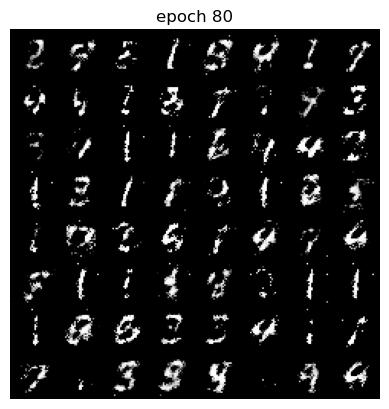

Epoch 80 of 100
Generator loss: 1.44676600, Discriminator loss: 1.02545128


118it [00:05, 21.61it/s]                                                           


Epoch 81 of 100
Generator loss: 1.43829012, Discriminator loss: 1.01611583


118it [00:05, 21.24it/s]                                                           


Epoch 82 of 100
Generator loss: 1.39013755, Discriminator loss: 1.03212534


118it [00:05, 20.76it/s]                                                           


Epoch 83 of 100
Generator loss: 1.41303369, Discriminator loss: 1.06223372


118it [00:05, 21.65it/s]                                                           


Epoch 84 of 100
Generator loss: 1.34125557, Discriminator loss: 1.05760084


118it [00:05, 20.65it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


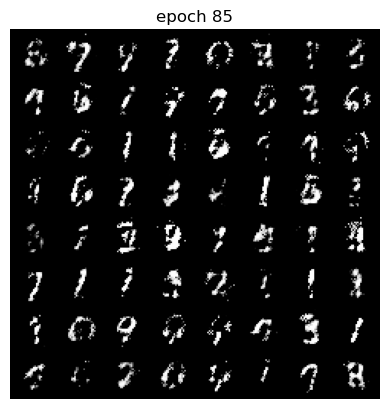

Epoch 85 of 100
Generator loss: 1.40785952, Discriminator loss: 1.03792364


118it [00:05, 20.72it/s]                                                           


Epoch 86 of 100
Generator loss: 1.37896189, Discriminator loss: 1.03053667


118it [00:05, 21.05it/s]                                                           


Epoch 87 of 100
Generator loss: 1.38909283, Discriminator loss: 1.03933769


118it [00:05, 20.50it/s]                                                           


Epoch 88 of 100
Generator loss: 1.32540581, Discriminator loss: 1.07162443


118it [00:05, 21.00it/s]                                                           


Epoch 89 of 100
Generator loss: 1.33401578, Discriminator loss: 1.06179948


118it [00:05, 21.20it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


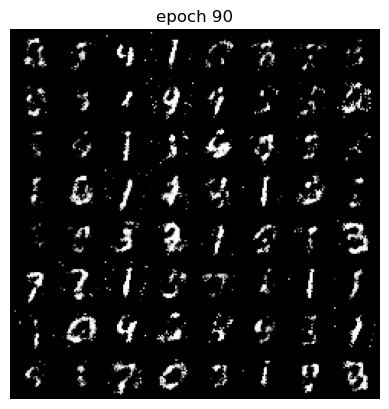

Epoch 90 of 100
Generator loss: 1.44316490, Discriminator loss: 1.01357504


118it [00:05, 21.26it/s]                                                           


Epoch 91 of 100
Generator loss: 1.39350110, Discriminator loss: 1.04135236


118it [00:05, 21.11it/s]                                                           


Epoch 92 of 100
Generator loss: 1.41221034, Discriminator loss: 1.03431687


118it [00:05, 21.19it/s]                                                           


Epoch 93 of 100
Generator loss: 1.39274876, Discriminator loss: 1.04021702


118it [00:05, 20.18it/s]                                                           


Epoch 94 of 100
Generator loss: 1.33993144, Discriminator loss: 1.05629314


118it [00:05, 20.79it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


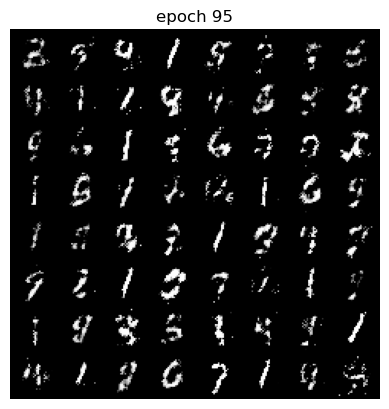

Epoch 95 of 100
Generator loss: 1.38597655, Discriminator loss: 1.03634375


118it [00:05, 20.61it/s]                                                           


Epoch 96 of 100
Generator loss: 1.29580798, Discriminator loss: 1.07051656


118it [00:05, 20.81it/s]                                                           


Epoch 97 of 100
Generator loss: 1.37065264, Discriminator loss: 1.06405737


118it [00:05, 21.05it/s]                                                           


Epoch 98 of 100
Generator loss: 1.33239052, Discriminator loss: 1.05473448


118it [00:05, 20.47it/s]                                                           


Epoch 99 of 100
Generator loss: 1.32983785, Discriminator loss: 1.06008025


118it [00:05, 20.81it/s]                                                           
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


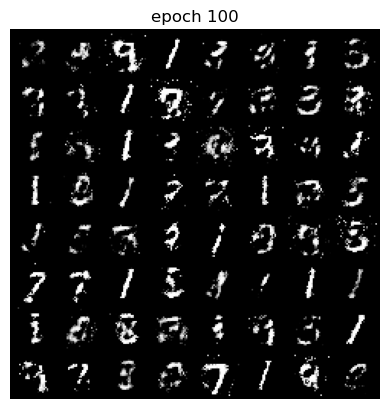

Epoch 100 of 100
Generator loss: 1.31206399, Discriminator loss: 1.07843331


In [31]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    

    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        # print(bi, len(data[0]))
        real_labels = label_real(len(data[0]))
        fake_labels = label_fake(len(data[0]))
        
        
        real_images = data[0].to(device)
        
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        discriminator.zero_grad()
        d_loss_real = criterion(discriminator(real_images), real_labels)
        d_loss_fake = criterion(discriminator(generated_images.detach()), fake_labels)
        d_loss = d_loss_real + d_loss_fake
        loss_d += d_loss.item()
        d_loss.backward()
        optim_d.step()
        
        z = create_noise(len(data[0]), nz)
        generated_images = generator(z)
        generator.zero_grad()
        g_loss = generator_loss(discriminator(generated_images), real_labels)
        loss_g += g_loss.item()
        g_loss.backward()
        optim_g.step()
        
        
        
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [32]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [33]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

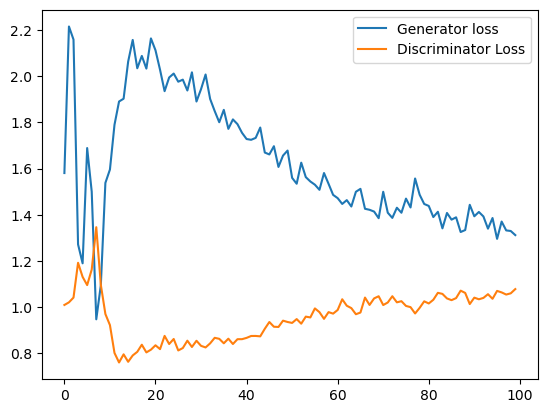

In [34]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')